Decision Tree

Tiatnic Survival Dataset

In [1]:
import pandas as pd
df = pd.read_csv('/home/user/Downloads/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [36]:
#Load the data sets- train and test 
train_df = pd.read_csv("train.csv")
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [37]:
#Look at top values of train data 
print("Train Data :")
print(train_df.head())

Train Data :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

In [38]:
#Print the column names of train data
print("Column Names in Train Data:")
print(train_df.columns)


Column Names in Train Data:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [40]:
#Print the dimension of train and test data
print("Training Data Dimensions:", train_df.shape)


Training Data Dimensions: (891, 12)


In [41]:
#Print the number of missing values in each column of train and test data
print("Missing Values in Train Data:")
print(train_df.isnull().sum())

Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

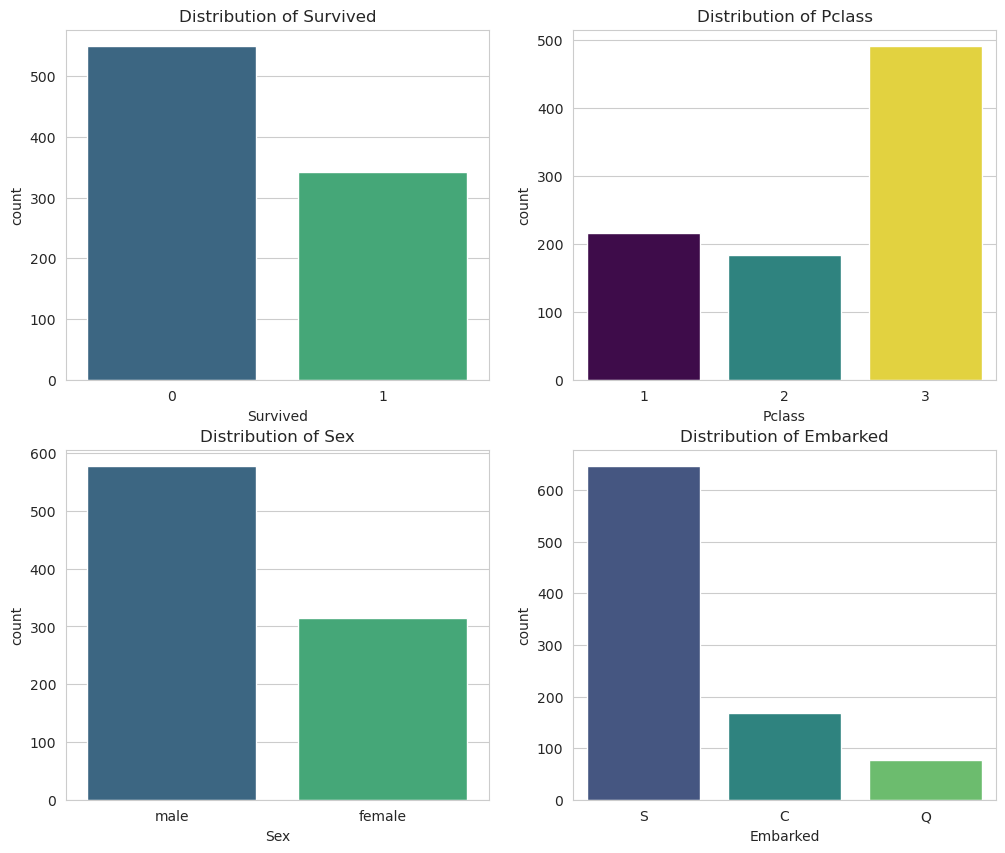

In [42]:
#Barchart of Survived, Pclass, Sex, Embarked
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define columns to plot
columns_to_plot = ["Survived", "Pclass", "Sex", "Embarked"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate bar plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, legend=False, palette="viridis")
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout and display the plot
plt.show()


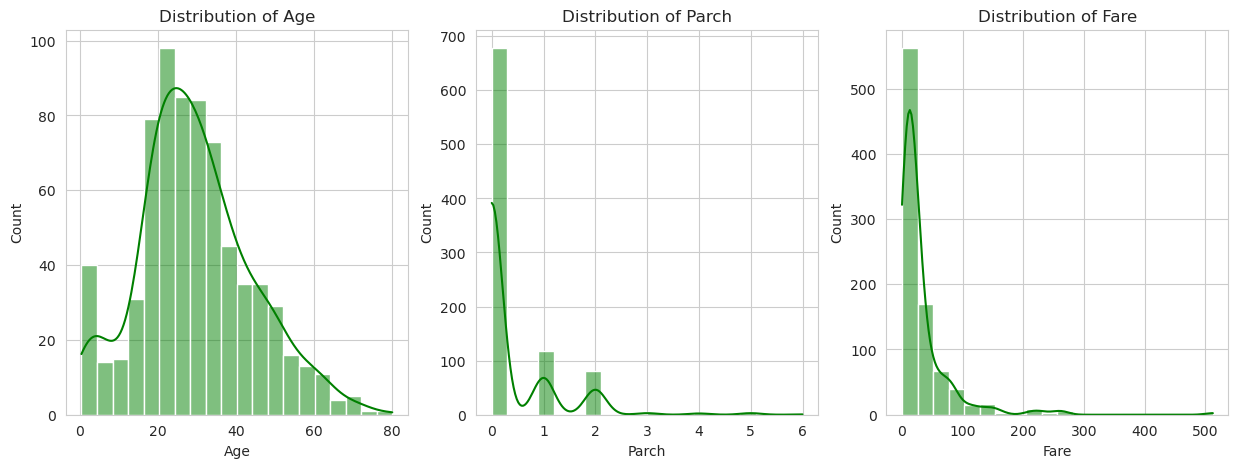

In [43]:
#Histogram of Age, Parch, Fare
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define columns to plot
columns_to_plot = ["Age", "Parch", "Fare"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generate histograms
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="green")
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout and display the plot
plt.show()

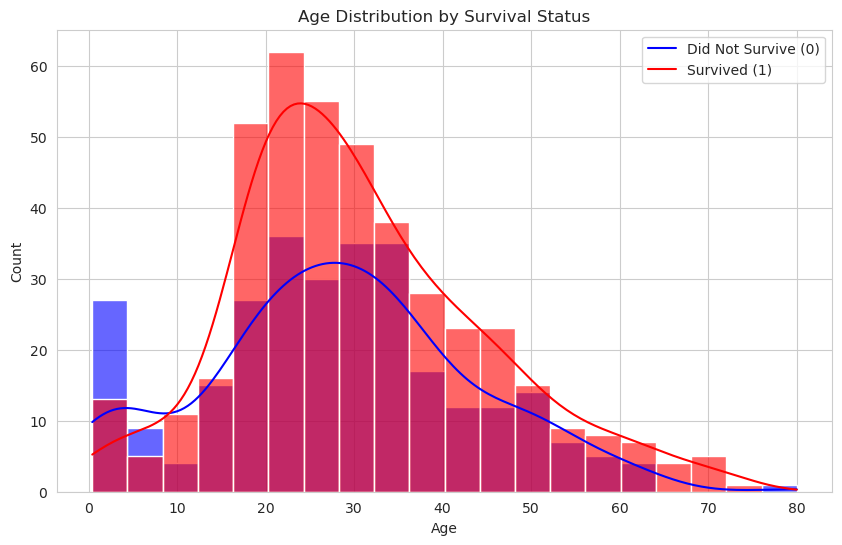

In [26]:
#Plot histogram of age for survived and did not survived class
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Survived", bins=20, kde=True, palette=["red", "blue"], alpha=0.6)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival Status")
plt.legend(["Did Not Survive (0)", "Survived (1)"])

# Show plot
plt.show()


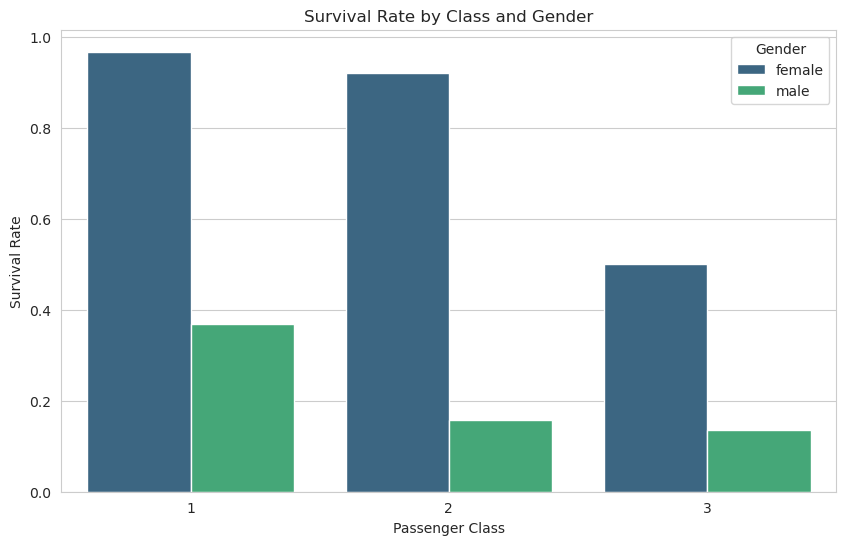

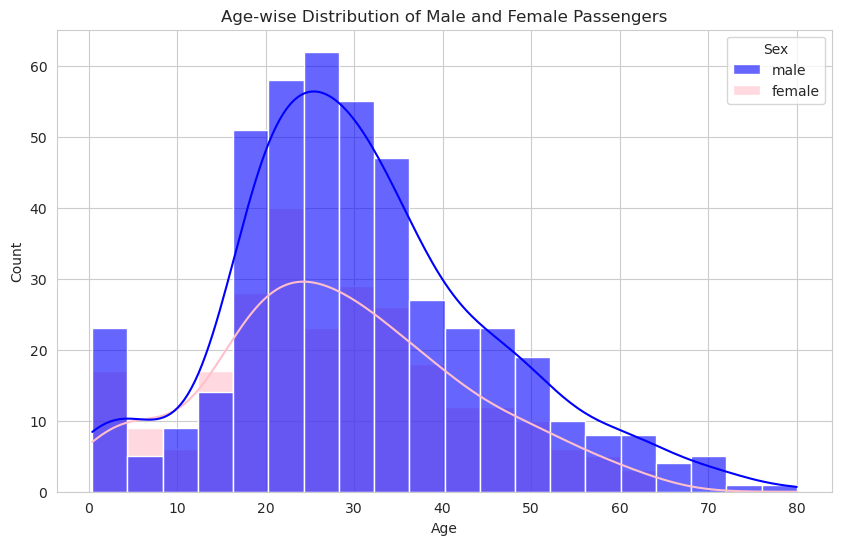

In [44]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a bar plot for survival rate by Pclass and Sex
plt.figure(figsize=(10, 6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, errorbar=None, palette="viridis")

# Labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Class and Gender")
plt.legend(title="Gender")

# Show plot
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Sex", bins=20, kde=True, palette=["blue", "pink"], alpha=0.6)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age-wise Distribution of Male and Female Passengers")

# Show plot
plt.show()


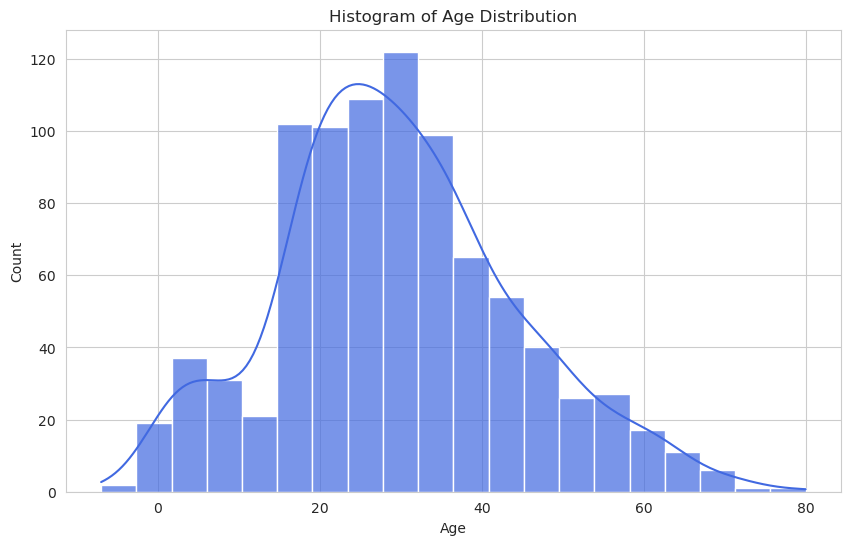

In [56]:
#Histogram of Age of the given data set(sample)
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=20, kde=True, color="royalblue", alpha=0.7)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age Distribution")

plt.show()

## Handling Missing Values

In [33]:
#Replace the msiing values in Embarked column by 'S'
df.fillna({"Embarked": "S"}, inplace=True)
# Verify if missing values are replaced
print(df["Embarked"].isnull().sum()) 

0


In [47]:
#Impute the missing values in Fare column with median value
# Replace missing values in 'Fare' column with the median value (corrected method)
df.fillna({"Fare": df["Fare"].median()}, inplace=True)

# Verify if missing values are replaced
print(df["Fare"].isnull().sum())  # Should print 0


0


In [48]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np

# Calculate mean and standard deviation of non-missing Age values
mean_age = df["Age"].mean()
std_age = df["Age"].std()

# Count missing values in Age column
num_missing = df["Age"].isnull().sum()

# Generate random values from a normal distribution with same mean & std deviation
random_ages = np.random.normal(mean_age, std_age, num_missing)

# Fill missing Age values with generated random values
df.loc[df["Age"].isnull(), "Age"] = random_ages

# Verify if missing values are replaced
print(df["Age"].isnull().sum())  # Should print 0


0


## Feature Engineering - Creating new features

In [49]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
print(df[["SibSp", "Parch", "FamilySize"]].head())


   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [50]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"] = df["FamilySize"] == 1

# Convert boolean to integer (0 = Not Alone, 1 = Alone)
df["IsAlone"] = df["IsAlone"].astype(int)

# Display the first few rows to verify
print(df[["FamilySize", "IsAlone"]].head())


   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [51]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Display the first few rows to verify
print(df.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


## Model Building

In [52]:
#Prepare X and y
# Define target variable (Survived)
y = df["Survived"]

# Define feature variables (drop target column)
X = df.drop(columns=["Survived"])

# Display the first few rows of X and y
print(X.head())
print(y.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  IsAlone
0       3    male  22.0      1      0   7.2500        S           2        0
1       1  female  38.0      1      0  71.2833        C           2        0
2       3  female  26.0      0      0   7.9250        S           1        1
3       1  female  35.0      1      0  53.1000        S           2        0
4       3    male  35.0      0      0   8.0500        S           1        1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [53]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform categories to numerical values
    label_encoders[col] = le  # Store encoder for future use (if needed)

# Display transformed data
print(X.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone
0       3    1  22.0      1      0   7.2500         2           2        0
1       1    0  38.0      1      0  71.2833         0           2        0
2       3    0  26.0      0      0   7.9250         2           1        1
3       1    0  35.0      1      0  53.1000         2           2        0
4       3    1  35.0      0      0   8.0500         2           1        1


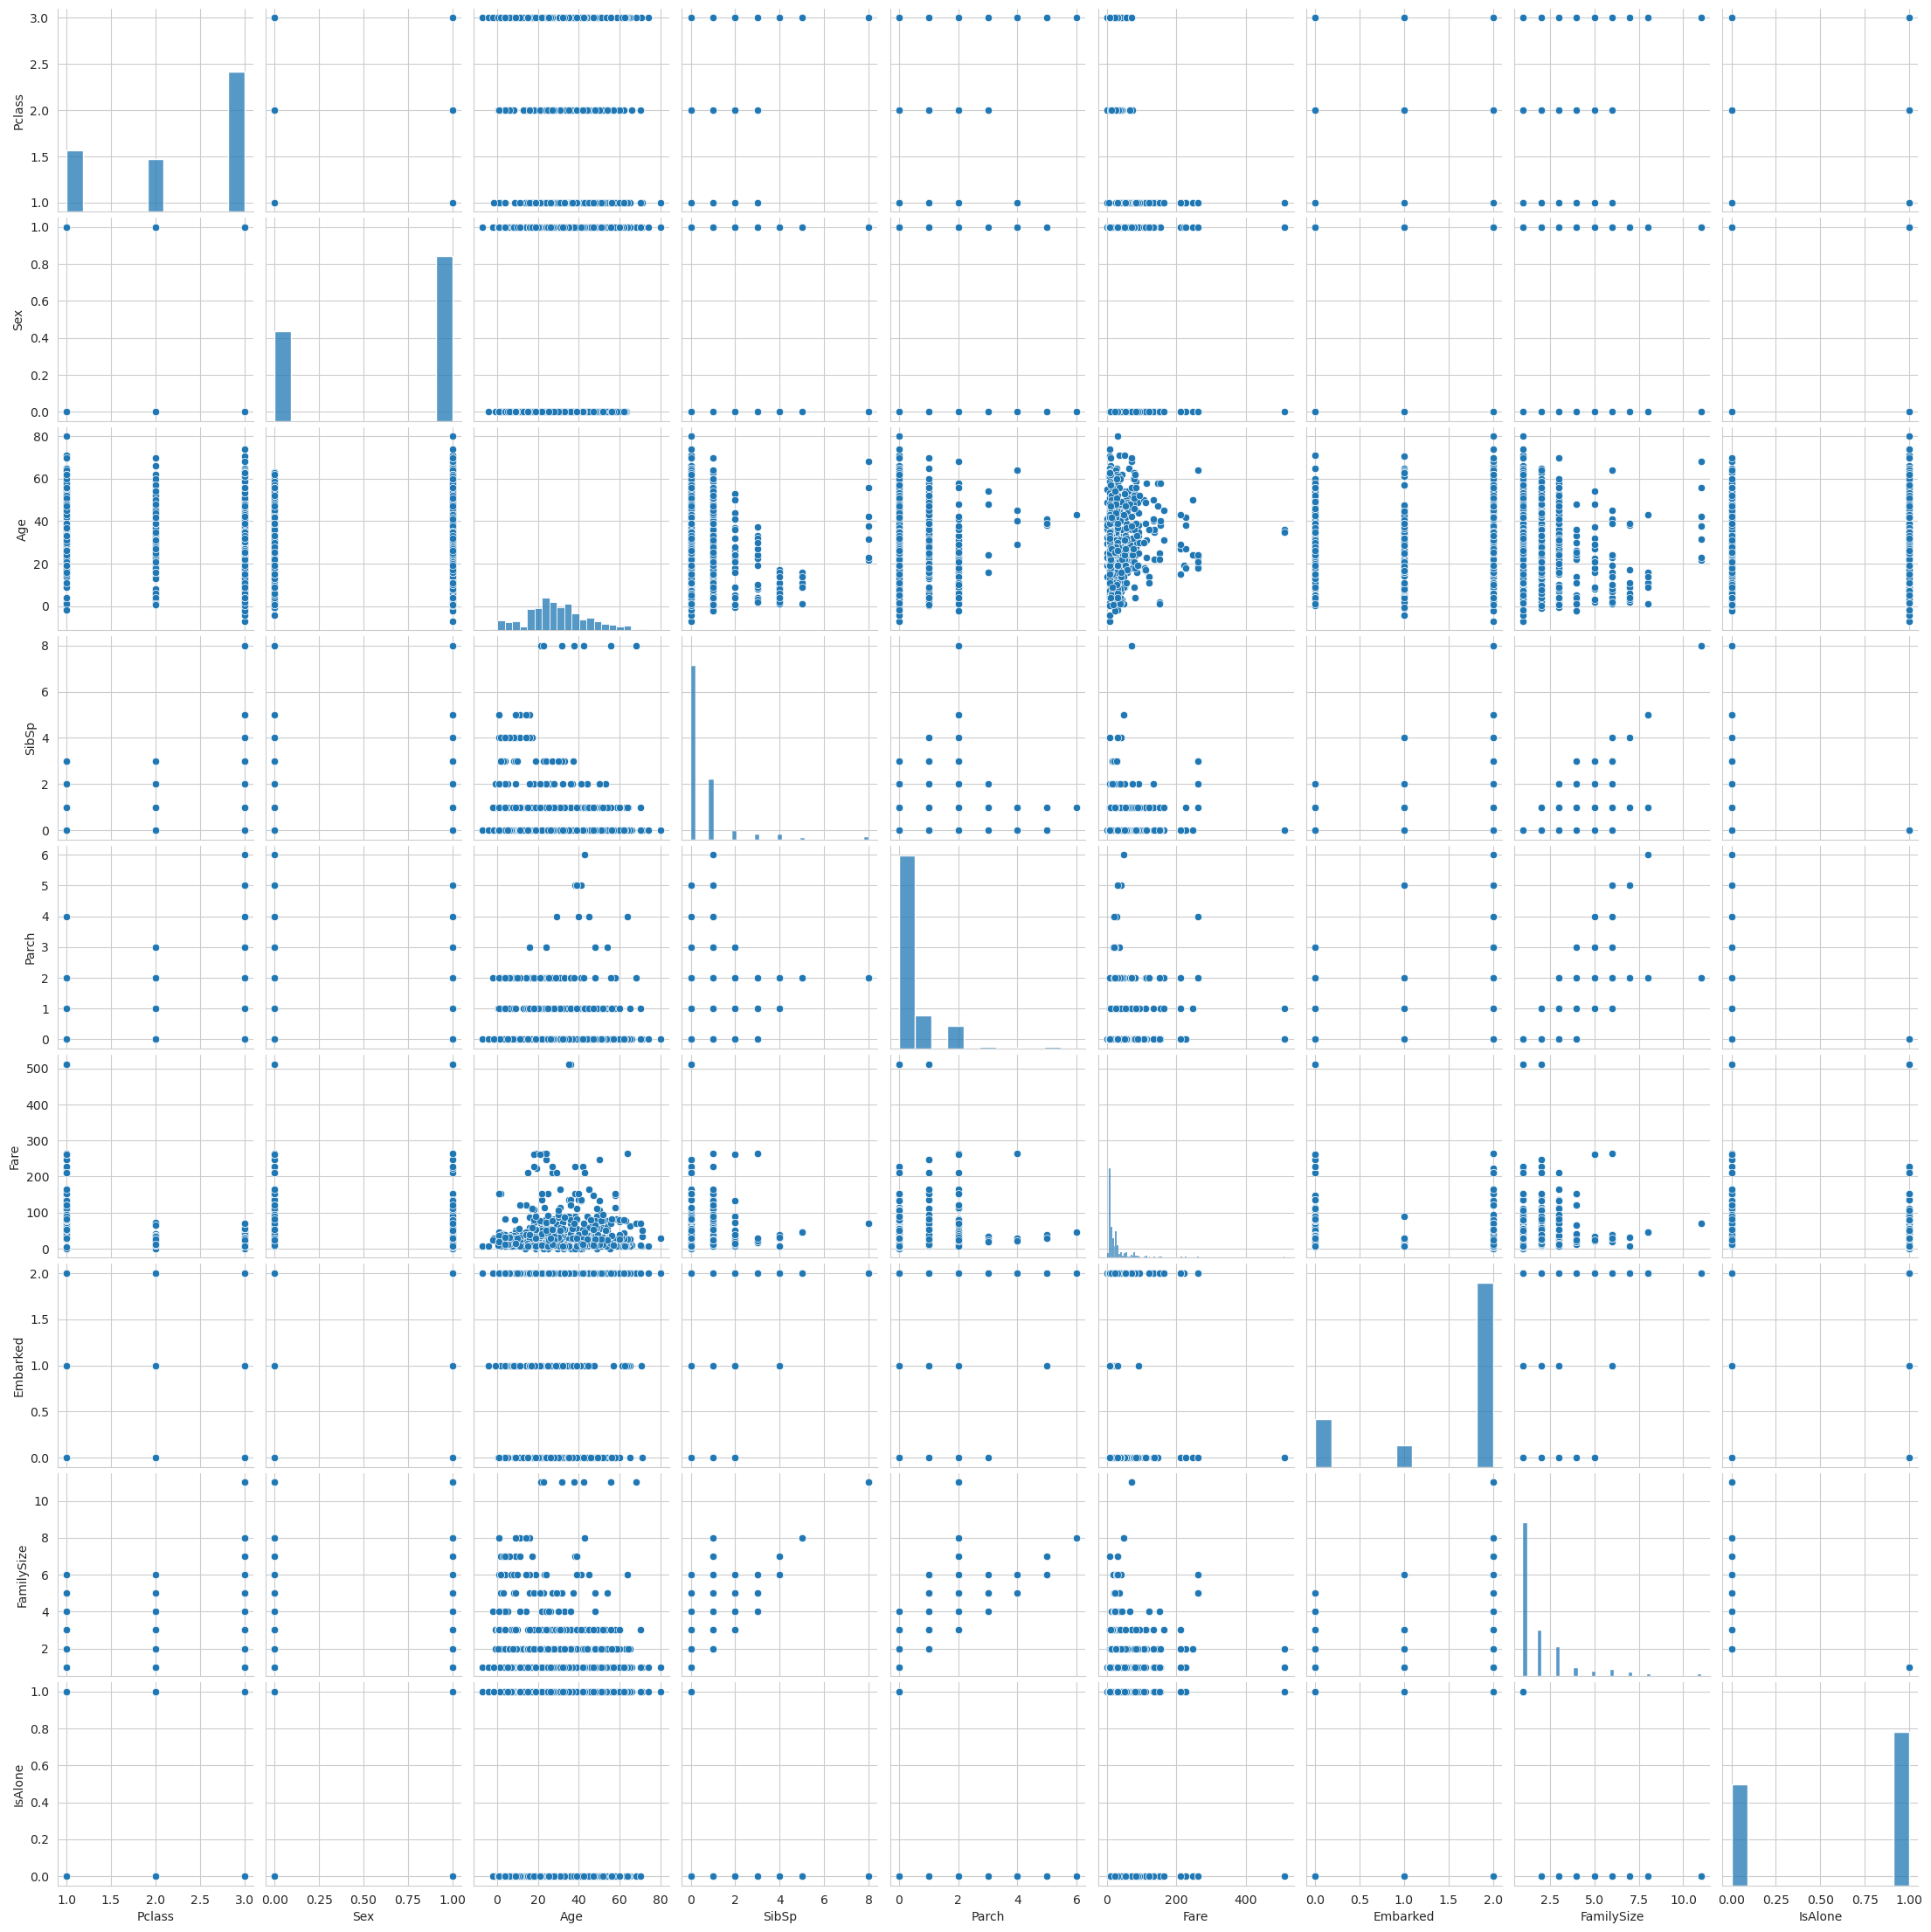

In [59]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of all features
sns.pairplot(df)

# Show the plot
plt.show()


In [60]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

# Split the dataset (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Display the shape of each dataset
print(f"X_train shape: {X_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_validation shape: {y_validation.shape}")

X_train shape: (801, 9)
X_validation shape: (90, 9)
y_train shape: (801,)
y_validation shape: (90,)


In [61]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Display the trained model
print(model)


DecisionTreeClassifier(random_state=42)


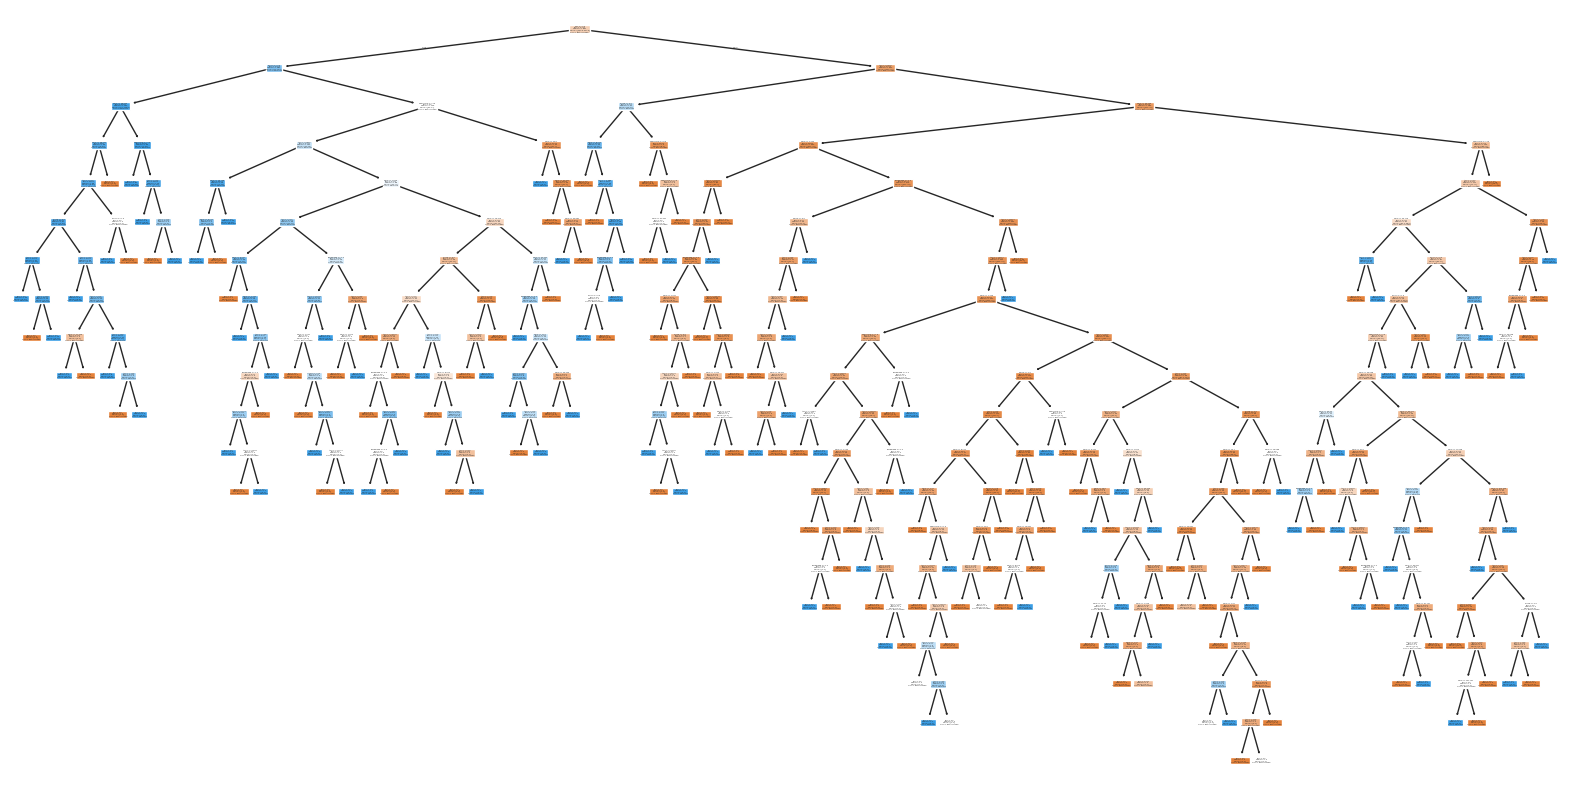

In [62]:
#Print the tree

# Importing required packages for visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Not Survived", "Survived"])

# Show the plot
plt.show()


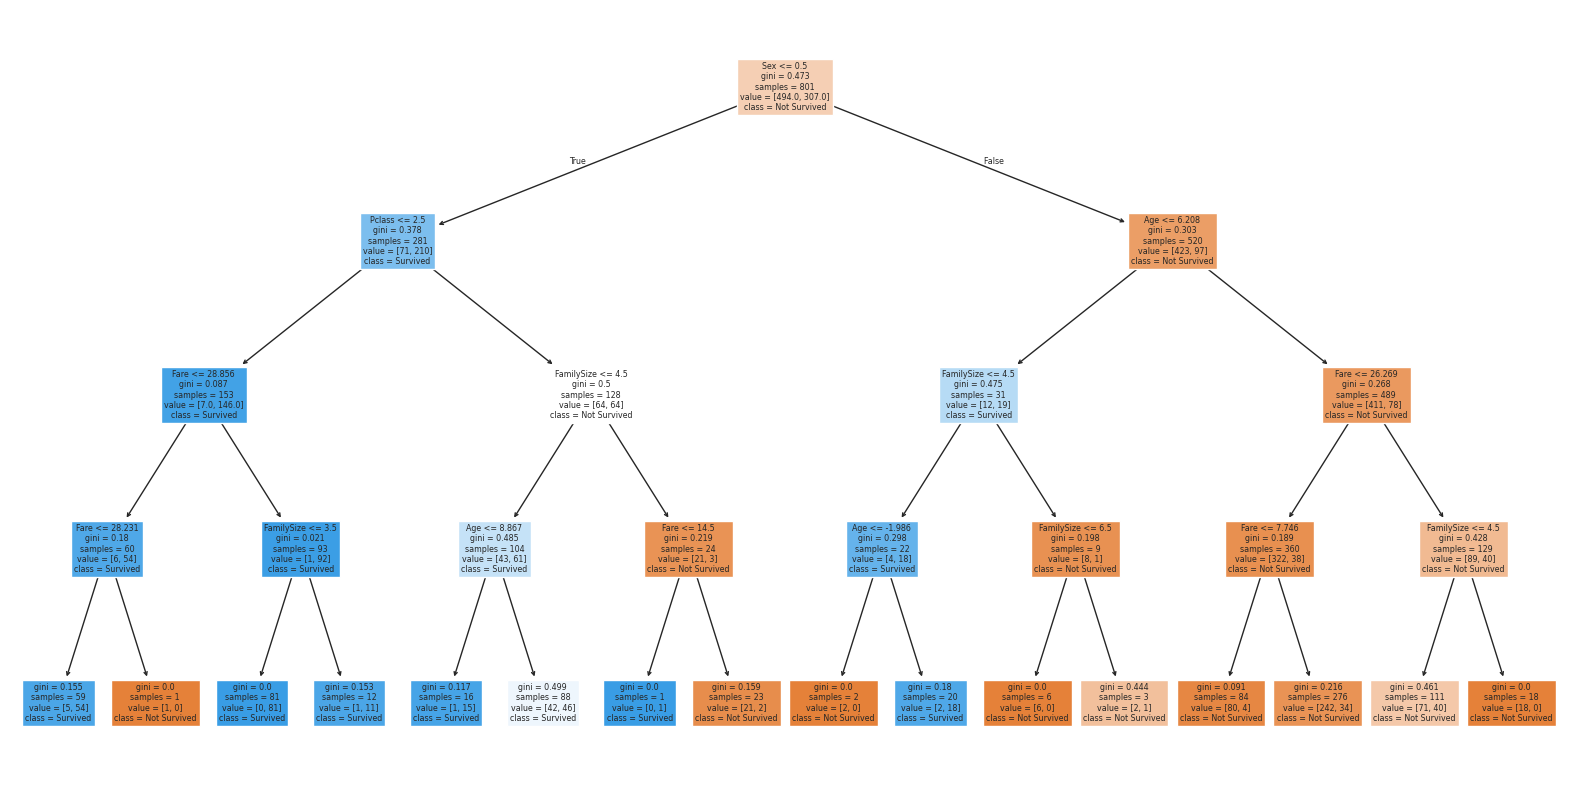

In [68]:
# plotting tree with max_depth=3
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create Decision Tree model with max_depth=3
model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree with max depth 3
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Not Survived", "Survived"])

# Show the plot
plt.show()


<img src="tree2.png">

In [69]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute accuracy
accuracy = accuracy_score(y_validation, y_pred)
print("\nAccuracy:", accuracy)

# Compute classification report (Precision, Recall, F1-score)
class_report = classification_report(y_validation, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[48  7]
 [12 23]]

Accuracy: 0.7888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.77      0.66      0.71        35

    accuracy                           0.79        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.79      0.79      0.79        90



In [70]:
# Printing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute and print the accuracy
accuracy = accuracy_score(y_validation, y_pred)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[48  7]
 [12 23]]

Accuracy: 0.7888888888888889
